# Summary of ABL results so far

The notebook below contains a summary of ABL results so far  
**Note**: To convert this notebook to PDF, use the command
```bash
$ jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to pdf All_Good_ABLRuns.ipynb
```

In [1]:
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
%%capture
# Important header information
naluhelperdir = '/ascldap/users/lcheung/local/Git/naluhelperscripts/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats
import yaml as yaml
from IPython.display import Image
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
%matplotlib inline
# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

In [3]:
# Target TI conditions
target_unstable = [[5,     10,    15],             # WS
                   [0.080, 0.075, 0.09],           # TI levels
                   [0.0,   0.0,   0.0],]           # Shear levels
target_neutral  = [[5,     10,    15],             # WS
                   [0.055, 0.055, 0.065]]          # TI levels
target_stable   = [[5,     10,    15 ],
                   [0.045, 0.05,  0.06]]

## List of good runs to use so far

In [26]:
# Locations of all of the runs
baserundir = '/ascldap/users/lcheung/nscratch/Torque2020/Runs/'
NumReqCols = 4   # Number of required columns in the table

# Index of all runs here
runlist=[
    # Name,          Location,                    averaging times,  yaml file, extra dict
    # -- Stable runs --
    
    #['stable 5m/s', 'stable/05ms/mini05_iter05',   [15000, 17500],  'abl_mini05ms_iter05_run1.yaml', {'ablfile':'abl_statistics.nc.run1','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['stable  5m/s', 'stable/05ms/mini05_iter18',   [15000, 20000],  'abl_mini05ms_iter18_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['stable 10m/s', 'stable/10ms/mini10_iter18',   [15000, 20000],  'abl_mini10ms_iter18_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['stable  5m/s', 'stable/05ms/05ms_iter01',     [15000, 20000],  'abl_stable05ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['stable 10m/s', '/stable/10ms/10ms_iter01',        [15000, 20000],  'abl_stable10ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    ['stable 15m/s', 'stable/15ms/15ms_iter01',     [15000, 20000],  'abl_stable15ms_iter01_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],
    #['stable 15m/s', 'stable/15ms/mini15_iter02',   [15000, 20000],  'abl_mini15ms_iter02_run1.yaml', {'ablfile':'abl_statistics.nc','color':'b', 'lw':2, 'pngimage':'HHplane_0014000_0_plane0.png'}],    
    
    # -- Neutral runs --
    ['neutral 5m/s',  'neutral/05ms/05ms_iter07',  [15000, 20000], 'abl_neut05ms_iter07_run1.yaml', {'ablfile':'abl_statistics.nc', 'color':'g', 'lstyle':'-', 'lw':2.5, 'pngimage':'HHplane_0030000_0_plane0.png'}],
    # -- Unstable runs --
    #['unstable 5m/s (mini)', 'unstable/05ms/mini05_iter13', [15000, 20000],  'abl_mini05ms_iter13_run1.yaml', {'color':'r', 'lw':2}],
    #['unstable 10m/s (mini)','unstable/10ms/mini10_iter08', [20000, 25000],  'abl_mini10ms_iter08_run1.yaml', {'color':'r', 'lw':2,'lstyle':'--'}],
    #['unstable 15m/s (mini)','unstable/15ms/mini15_iter06', [10000, 15000],  'abl_mini15ms_iter06_run1.yaml', {'color':'r', 'lw':2,'lstyle':'-.'}],

    ['neutral 10m/s', 'neutral/10ms/10ms_iter03',  [15000, 20000], 'abl_neut10ms_iter03_run1.yaml', {'color':'g', 'lstyle':'--', 'lw':2.5, 'pngimage':'HHplane_0030000_0_plane0.png'}],
    ['neutral 15m/s', 'neutral/15ms/15ms_iter03',  [15000, 20000], 'abl_neut15ms_iter03_run1.yaml', {'color':'g', 'lstyle':'-.', 'lw':2.5, 'pngimage':'HHplane_0030000_0_plane0.png'}],
    
    ['unstable 5m/s', 'unstable/05ms/05ms_iter01',   [15000, 20000],  'abl_unstable05ms_iter01_run1.yaml', {'color':'r', 'lw':2, 'pngimage':'HHplane_0016000_0_plane0.png'}],
    ['unstable 10m/s','unstable/10ms/10ms_iter01',   [15000, 25000],  'abl_unstable10ms_iter01_run1.yaml', {'color':'r', 'lw':2,'lstyle':'--', 'pngimage':'HHplane_0010000_0_plane0.png'}],
    ['unstable 15m/s','unstable/15ms/15ms_iter01',   [15000, 20000],   'abl_unstable15ms_iter01_run2.yaml', {'color':'r', 'lw':2,'lstyle':'-.'}],
]

# Hub-height locations
plotheights=[20]

In [5]:
%%capture
# Pull the data from disk
alldata=[]
allVdata=[]
allTIdata=[]
allTdata=[]
allVeerdata=[]
allAlphadata=[]
allutau=[]
for run in runlist:
    rundict       = run[NumReqCols] if (len(run)>NumReqCols) else {}
    statsfile     = rundict['ablfile'] if 'ablfile' in rundict else 'abl_statistics.nc'
    rundir        = baserundir+'/'+run[1]
    avgtimes      = run[2]
    data          = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+statsfile);
    runresults    = plotABLstats.reportABLstats(data, heights=plotheights, tlims=avgtimes);
    alldata.append(runresults[0])
    utau          = plotABLstats.avgutau(data, heights=plotheights, tlims=avgtimes);
    allutau.append(utau)
    
    # Profile information
    Vprof, header    = plotABLstats.plotvelocityprofile(data, None, tlims=avgtimes, exportdata=True)
    TIprof, header   = plotABLstats.plotTIprofile(data, None, tlims=avgtimes, exportdata=True)
    Tprof, header    = plotABLstats.plottemperatureprofile(data, None, tlims=avgtimes, exportdata=True)
    Veerprof, header = plotABLstats.plotveerprofile(data, None, tlims=avgtimes, exportdata=True)
    Alphaprof,header = plotABLstats.plotShearAlpha(data, None, tlims=avgtimes, exportdata=True)
    
    allVdata.append(Vprof)
    allTIdata.append(TIprof)
    allTdata.append(Tprof)
    allVeerdata.append(Veerprof)
    allAlphadata.append(Alphaprof)
allrundata=np.array(alldata)


## Table of results and input parameters
### Horizontally averaged results
At the 20m met mast height, this is the output from the ABL:  

In [6]:
# Print a pretty table of the hub-height results
print("%-22s %8s %8s %10s %12s %15s %12s"%("Name", "WS [m/s]","TI [-]","Alpha [-]","WDir [deg]","Obukhov L[m]","Utau [m/s]"))
print("%-22s %8s %8s %10s %12s %15s %12s"%("====", "========","======","=========","==========","============","=========="))
for ir, row in enumerate(runlist):
    name = row[0]
    data = alldata[ir]
    print("%-22s %8.2f %8.4f %10.4f %12.2f %15.3e %12.4f"%(name, data[0], data[1], data[2], data[3],data[4],allutau[ir]))

Name                   WS [m/s]   TI [-]  Alpha [-]   WDir [deg]    Obukhov L[m]   Utau [m/s]
====                   ========   ======  =========   ==========    ============   ==========
stable  5m/s               5.00   0.0462     0.2314       224.99       4.281e+02       0.1493
stable 10m/s              10.00   0.0512     0.2127       225.00       3.569e+02       0.3059
stable 15m/s              15.00   0.0609     0.1321       225.00       3.763e+02       0.5061
neutral 5m/s               5.00   0.0550     0.0668       225.00       5.655e+06       0.1503
neutral 10m/s             10.00   0.0569     0.0638       225.00       5.964e+05       0.3002
neutral 15m/s             15.00   0.0645     0.0723       225.00       2.007e+05       0.5055
unstable 5m/s              5.00   0.0861     0.0222       315.00      -2.911e+01       0.1636
unstable 10m/s            10.00   0.0781     0.0232       315.00      -4.121e+01       0.3192
unstable 15m/s            15.00   0.0899     0.0636       31

Where the Obukhov length $L$ is defined as
$$
L = -\frac{u_\tau^3}{\frac{\kappa g}{T}\overline{w'T'}}
$$ 

### Inputs  
These are the roughness and heat flux inputs to Nalu-Wind: 

# Extract yaml file BC parameters
print("%-22s %9s %9s"%("Case", "z0",   "heat_flux"))
print("%-22s %9s %9s"%("====", "====", "========="))
for run in runlist:
    rundict       = run[NumReqCols] if (len(run)>NumReqCols) else {}
    rundir        = baserundir+'/'+run[1]
    yamlfile      = rundir+'/'+run[3]
    with open(yamlfile) as fp:
        yamldata      = yaml.load(fp)
        BCs           = yamldata['realms'][0]['boundary_conditions']
        for bc in BCs:
            if bc['target_name'] == 'lower':
                print("%-22s %9.5f % 8.3f"%
                    (run[0], bc['wall_user_data']['roughness_height'], bc['wall_user_data']['heat_flux']))
    fp.close()

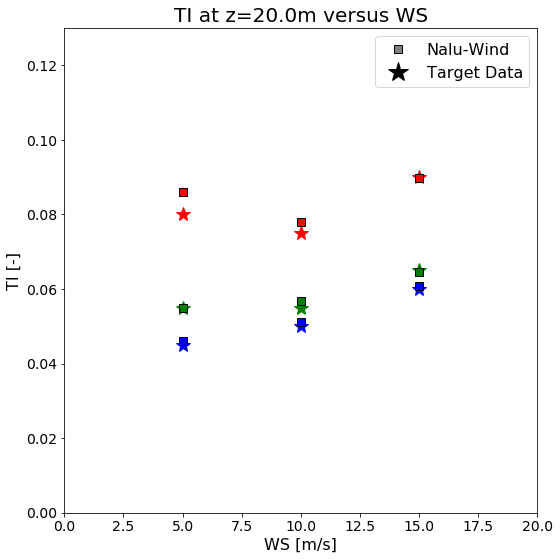

In [27]:
plt.figure(figsize=(8,8))
# Plot the target conditions
plt.plot(target_neutral[0],   target_neutral[1],   'g*',  markersize=15, label='target neutral')
plt.plot(target_unstable[0],  target_unstable[1],  'r*',  markersize=15, label='target unstable')
plt.plot(target_stable[0],    target_stable[1],    'b*',  markersize=15, label='target stable')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    plt.plot(rundata[0], rundata[1], 's', color=pltcolor, markersize=8, markeredgecolor='k')

# Formatting
plt.xlim([0, 20])
plt.ylim([0, 0.13])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('TI [-]', fontsize=16)
plt.title('TI at z=%0.1fm versus WS'%plotheights[0], fontsize=20)
legend_el = [ #Line2D([0],[0], linestyle='', marker='s', markersize=8, color='b', label='Large domain'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='gray', markeredgecolor='k', label='Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='*', markersize=20, color='k', label='Target Data')]
plt.legend(handles=legend_el, fontsize=16)
#plt.grid()
plt.tight_layout()

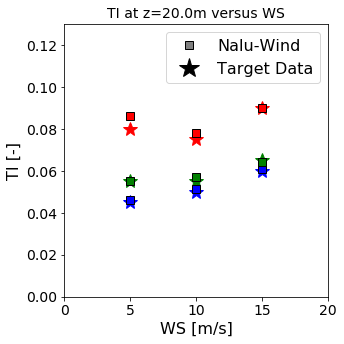

In [28]:
# ---- Paper version of figure ---
plt.figure(figsize=(5,5))
# Plot the target conditions
plt.plot(target_neutral[0],   target_neutral[1],   'g*',  markersize=15, label='target neutral')
plt.plot(target_unstable[0],  target_unstable[1],  'r*',  markersize=15, label='target unstable')
plt.plot(target_stable[0],    target_stable[1],    'b*',  markersize=15, label='target stable')

plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    plt.plot(rundata[0], rundata[1], 's', color=pltcolor, markersize=8, markeredgecolor='k')

# Formatting
plt.xlim([0, 20])
plt.ylim([0, 0.13])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('TI [-]', fontsize=16)
plt.title('TI at z=%0.1fm versus WS'%plotheights[0], fontsize=14)
legend_el = [ #Line2D([0],[0], linestyle='', marker='s', markersize=8, color='b', label='Large domain'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='gray', markeredgecolor='k', label='Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='*', markersize=20, color='k', label='Target Data')]
plt.legend(handles=legend_el, fontsize=16)
#plt.grid()
plt.tight_layout()

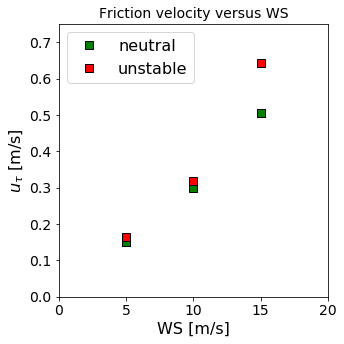

In [9]:
# Plot utau with WS
# ---- Paper version of figure ---
plt.figure(figsize=(5,5))
# Plot the target conditions
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    plt.plot(rundata[0], allutau[irun], 's', color=pltcolor, markersize=8, markeredgecolor='k')

# Formatting
plt.xlim([0, 20])
plt.ylim([0, 0.75])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('$u_\\tau$ [m/s]', fontsize=16)
plt.title('Friction velocity versus WS', fontsize=14)
legend_el = [ Line2D([0],[0], linestyle='', marker='s', markersize=8, color='g', markeredgecolor='k', label='neutral'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='r', markeredgecolor='k', label='unstable'),]
plt.legend(handles=legend_el, fontsize=16)
#plt.grid()
plt.tight_layout()

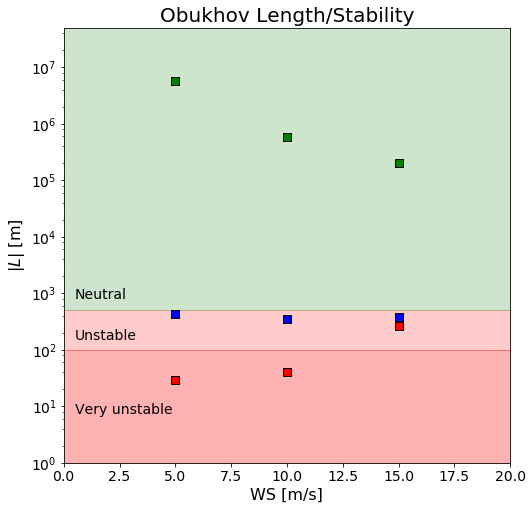

In [29]:
plt.figure(figsize=(8,8))
# Plot the target conditions
#plt.plot(target_neutral[0],   target_neutral[1],   'g*',  markersize=15, label='target neutral')
#plt.plot(target_unstable[0],  target_unstable[1],  'r*',  markersize=15, label='target unstable')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    plt.semilogy(rundata[0], abs(rundata[4]), 's', color=pltcolor, markersize=8, markeredgecolor='k')

# Formatting
plt.fill_between(np.arange(0,21),1,100,color='r',alpha=0.3)
plt.fill_between(np.arange(0,21),100,500,color='r',alpha=0.2)
plt.fill_between(np.arange(0,21),500,1e8,color='g',alpha=0.2)
plt.text(0.5,7.5, 'Very unstable')
plt.text(0.5,150, 'Unstable')
plt.text(0.5,8e2, 'Neutral')
plt.xlim([0, 20])
plt.ylim([1, 5e7])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('$|L|$ [m]', fontsize=16)
plt.title('Obukhov Length/Stability', fontsize=20)

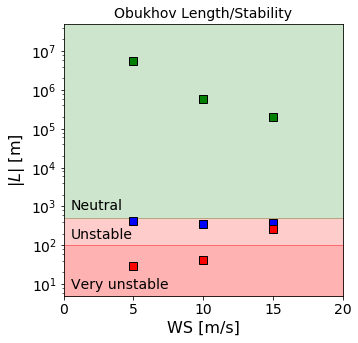

In [30]:
# --- Paper version of figure ---
plt.figure(figsize=(5,5))
# Plot the target conditions
#plt.plot(target_neutral[0],   target_neutral[1],   'g*',  markersize=15, label='target neutral')
#plt.plot(target_unstable[0],  target_unstable[1],  'r*',  markersize=15, label='target unstable')
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    plt.semilogy(rundata[0], abs(rundata[4]), 's', color=pltcolor, markersize=8, markeredgecolor='k')

# Formatting
plt.fill_between(np.arange(0,21),5,100,color='r',alpha=0.3)
plt.fill_between(np.arange(0,21),100,500,color='r',alpha=0.2)
plt.fill_between(np.arange(0,21),500,1e8,color='g',alpha=0.2)
plt.text(0.5,7.5, 'Very unstable')
plt.text(0.5,150, 'Unstable')
plt.text(0.5,8e2, 'Neutral')
plt.xlim([0, 20])
plt.ylim([5, 5e7])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('$|L|$ [m]', fontsize=16)
plt.title('Obukhov Length/Stability', fontsize=14)

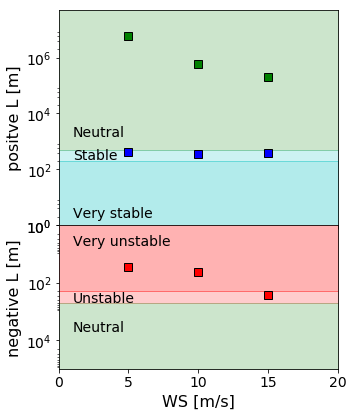

In [37]:
# --- Paper version of figure ---
plt.rc('font', size=14)
plt.rc('xtick', labelsize=14)
f, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=False, figsize=(5,6.6), gridspec_kw={'height_ratios': [1.5, 1]},)

# Do positive value stuff
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    if rundata[4]>0:
        ax1.semilogy(rundata[0], abs(rundata[4]), 's', color=pltcolor, markersize=8, markeredgecolor='k')

minLfig   = 1
minStable = 200
minNeutral= 500
ax1.fill_between(np.arange(0,21),minLfig,   minStable,   color='c',alpha=0.3)
ax1.fill_between(np.arange(0,21),minStable, minNeutral,  color='c',alpha=0.2)
ax1.fill_between(np.arange(0,21),minNeutral,1e8,   color='g',alpha=0.2)
ax1.text(1,2,    'Very stable')
ax1.text(1,225,  'Stable')
ax1.text(1,1500, 'Neutral')

ax1.set_ylim([minLfig, 5e7]);
ax1.set_ylabel('positve L [m]', fontsize=16)

# Do negative value stuff
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'r')
    if rundata[4]<0:
        ax2.semilogy(rundata[0], abs(rundata[4]), 's', color=pltcolor, markersize=8, markeredgecolor='k')

ax2.fill_between(np.arange(0,21),minLfig,   minStable,color='r',alpha=0.3)
ax2.fill_between(np.arange(0,21),minStable, minNeutral,  color='r',alpha=0.2)
ax2.fill_between(np.arange(0,21),minNeutral,1e8,   color='g',alpha=0.2)
ax2.text(1,5,    'Very unstable')
ax2.text(1,500,  'Unstable')
ax2.text(1,5000, 'Neutral')

f.subplots_adjust(hspace=0)

ax2.set_xlim([0, 20]);
ax2.set_xlabel('WS [m/s]', fontsize=16)
ax2.set_ylim([1e5, minLfig]);
ax2.set_ylabel('negative L [m]', fontsize=16)

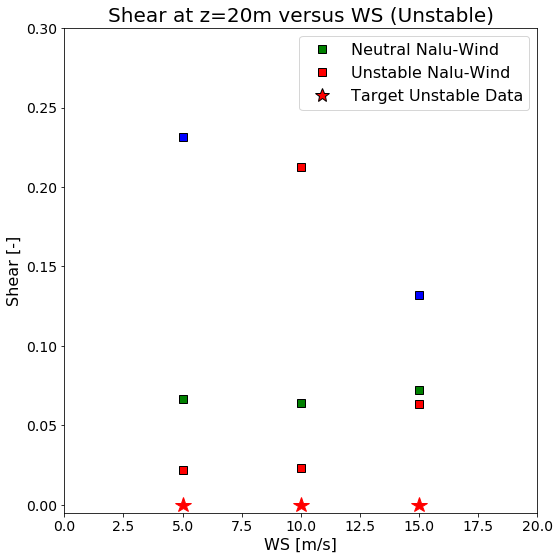

In [13]:
plt.figure(figsize=(8,8))
plt.rc('font', size=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[0], rundata[2], 's', color=pltcolor, markersize=8, markeredgecolor='k')
    
# Plot the target conditions
plt.plot(target_unstable[0],  target_unstable[2],  'r*',  markersize=16, label='target unstable')
# Format the plot
plt.xlim([0, 20])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('Shear [-]', fontsize=16)
plt.ylim([-0.005, 0.30])
plt.title('Shear at z=20m versus WS (Unstable)', fontsize=20)
legend_el = [Line2D([0],[0], linestyle='', marker='s', markersize=8, color='g', markeredgecolor='k', label='Neutral Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='r', markeredgecolor='k', label='Unstable Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='*', markersize=15, color='r', markeredgecolor='k',label='Target Unstable Data')]
plt.legend(handles=legend_el, fontsize=16)
plt.tight_layout()

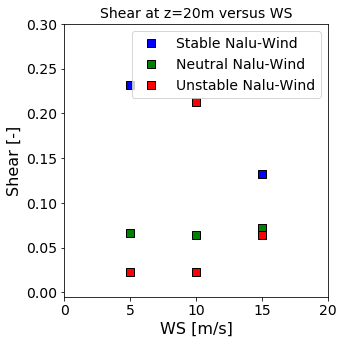

In [14]:
# --- Paper version ---
plt.figure(figsize=(5,5))
plt.rc('font', size=14)
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[0], rundata[2], 's', color=pltcolor, markersize=8,markeredgecolor='k')
    
# Plot the target conditions
#plt.plot(target_unstable[0],  target_unstable[2],  'r*',  markersize=16, label='target unstable')
# Format the plot
plt.xlim([0, 20])
plt.xlabel('WS [m/s]', fontsize=16)
plt.ylabel('Shear [-]', fontsize=16)
plt.ylim([-0.005, 0.30])
plt.title('Shear at z=20m versus WS', fontsize=14)
legend_el = [Line2D([0],[0], linestyle='', marker='s', markersize=8, color='b',markeredgecolor='k', label='Stable Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='g',markeredgecolor='k', label='Neutral Nalu-Wind'),
             Line2D([0],[0], linestyle='', marker='s', markersize=8, color='r', markeredgecolor='k',label='Unstable Nalu-Wind'),
             #Line2D([0],[0], linestyle='', marker='*', markersize=15, color='r', label='Target Unstable Data')
            ]
plt.legend(handles=legend_el, fontsize=14)
plt.tight_layout()

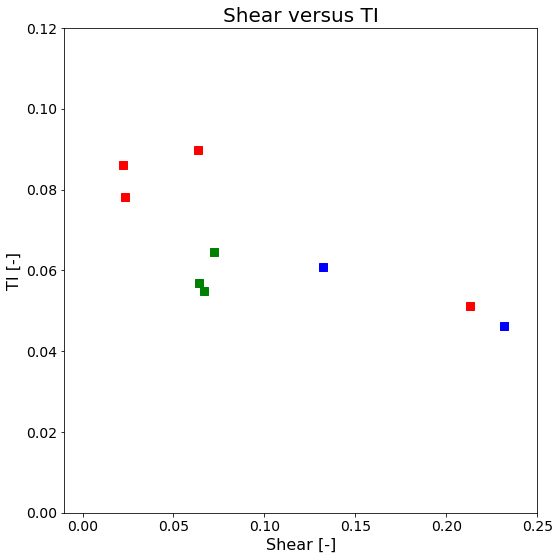

In [15]:
# Plot shear vs TI
plt.figure(figsize=(8,8))
for irun, rundata in enumerate(allrundata):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = rundict['color'] if 'color' in rundict else 'r'
    plt.plot(rundata[2], rundata[1], 's', color=pltcolor, markersize=8)

#plt.plot(target_unstable[2],  target_unstable[1],  'r*',  markersize=20, label='target unstable')

plt.xlim([-0.01, 0.25])
plt.ylim([0,   0.12])
plt.xlabel('Shear [-]', fontsize=16)
plt.ylabel('TI [-]', fontsize=16)
plt.title('Shear versus TI', fontsize=20)
plt.tight_layout()

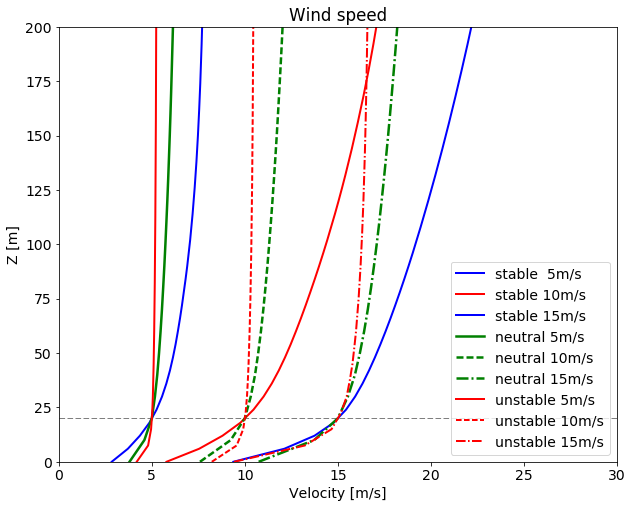

In [16]:
# Plot the velocity profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Vprof    = allVdata[irun]
    plt.plot(Vprof[:,4], Vprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
for hh in plotheights: plt.hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

# Construct a legend
plt.legend()
plt.ylim([0,200]);
plt.xlim([0, 30])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('Wind speed')

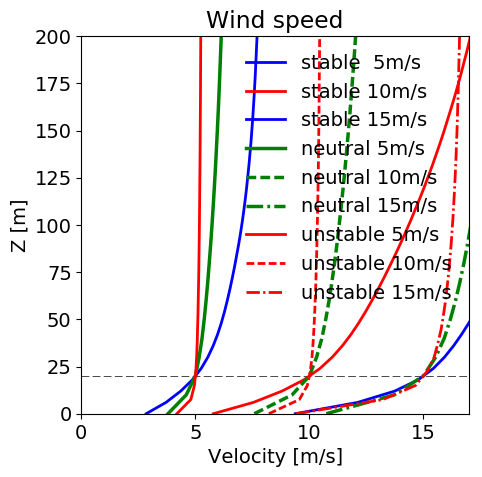

In [17]:
# --- Paper version ---
plt.figure(figsize=(5,5),dpi=100)
plt.rc('font', size=14)
for irun, run in enumerate(runlist[:]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Vprof    = allVdata[irun]
    plt.plot(Vprof[:,4], Vprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
for hh in plotheights: plt.hlines(hh, 0, 35, linestyles='dashed', linewidth=0.5)

# Construct a legend
plt.legend(loc='upper right',frameon=False)
plt.ylim([0,200]);
plt.xlim([0, 17])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('Wind speed')

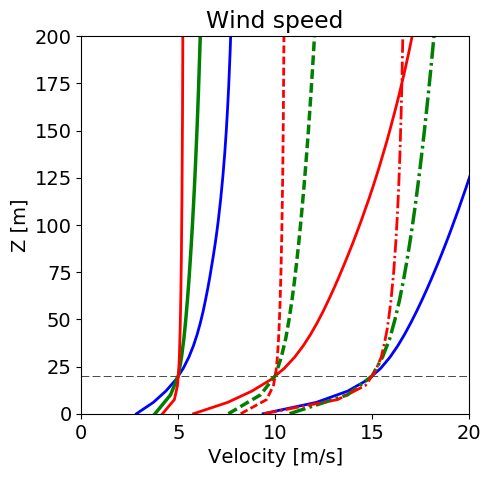

In [18]:
# --- Powerpoint version ---
plt.figure(figsize=(5,5),dpi=100)
plt.rc('font', size=14)
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Vprof    = allVdata[irun]
    plt.plot(Vprof[:,4], Vprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
for hh in plotheights: plt.hlines(hh, 0, 35, linestyles='dashed', linewidth=0.5)

# Construct a legend
#plt.legend(loc='upper right',frameon=False)
plt.ylim([0,200]);
plt.xlim([0, 20])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('Wind speed')

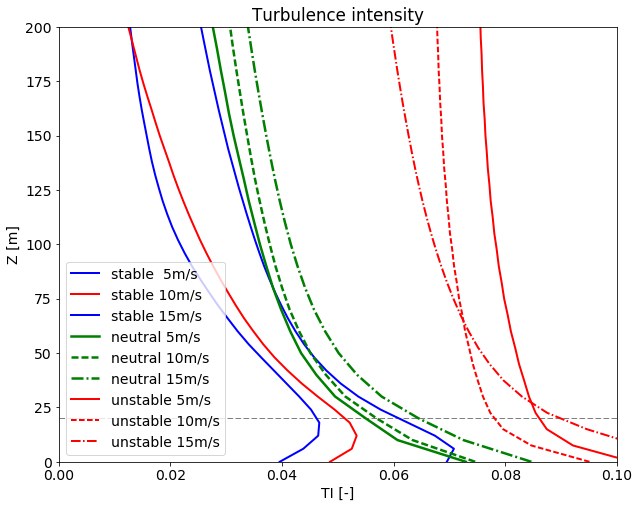

In [19]:
# Plot the TI profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)
maxTI=0
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    TIprof   = allTIdata[irun]
    maxTI=max(maxTI, max(TIprof[:,1]))
    plt.plot(TIprof[:,1], TIprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    
for hh in plotheights: plt.hlines(hh, 0, maxTI, linestyles='dashed', linewidth=0.5)
plt.legend()
plt.ylim([0,200]);
plt.xlim([0, 0.1])
plt.xlabel('TI [-]')
plt.ylabel('Z [m]')
plt.title('Turbulence intensity')

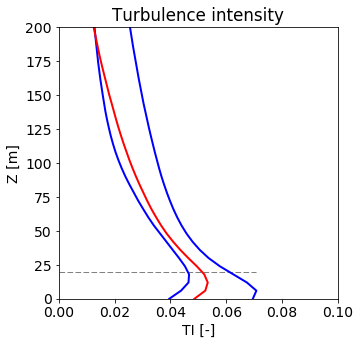

In [20]:
# --- Paper version ---
plt.figure(figsize=(5,5))
plt.rc('font', size=14)
maxTI=0
for irun, run in enumerate(runlist[:3]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    TIprof   = allTIdata[irun]
    maxTI=max(maxTI, max(TIprof[:,1]))
    plt.plot(TIprof[:,1], TIprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    
for hh in plotheights: plt.hlines(hh, 0, maxTI, linestyles='dashed', linewidth=0.5)
#plt.legend()
plt.ylim([0,200]);
plt.xlim([0, 0.1])
plt.xlabel('TI [-]')
plt.ylabel('Z [m]')
plt.title('Turbulence intensity')

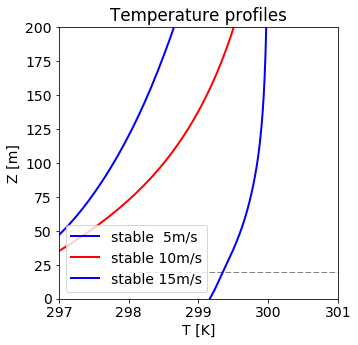

In [21]:
# Plot the T profile comparisons
plt.figure(figsize=(5,5));
plt.rc('font', size=14)
for irun, run in enumerate(runlist[:3]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Tprof    = allTdata[irun]
    plt.plot(Tprof[:,1], Tprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)
    
for hh in plotheights: plt.hlines(hh, 298, 303, linestyles='dashed', linewidth=0.5)
plt.legend()
plt.ylim([0,200]);
plt.xlim([297, 301])
plt.xlabel('T [K]')
plt.ylabel('Z [m]')
plt.title('Temperature profiles')

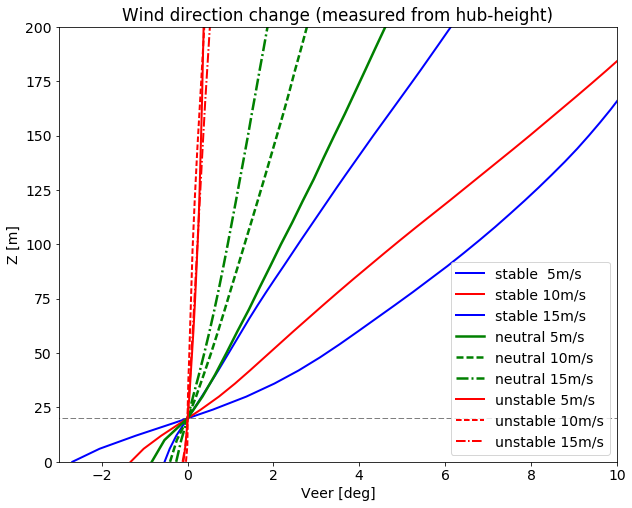

In [22]:
# Plot the Veer profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    data     = alldata[irun]
    Wdir     = data[3]
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Veerprof = allVeerdata[irun]
    plt.plot(Veerprof[:,1]-Wdir, Veerprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)

for hh in plotheights: plt.hlines(hh, -10, 10, linestyles='dashed', linewidth=0.5)
plt.legend()
plt.ylim([0,200]);
plt.xlim([-3,10]);
plt.xlabel('Veer [deg]')
plt.ylabel('Z [m]')
plt.title('Wind direction change (measured from hub-height)')

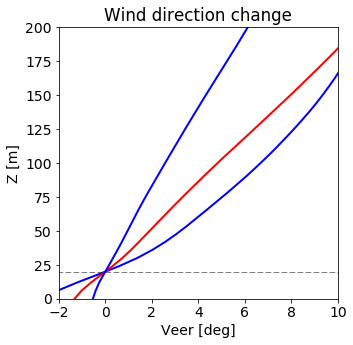

In [23]:
# --- Paper version ---
plt.figure(figsize=(5,5))
plt.rc('font', size=14)
for irun, run in enumerate(runlist[:3]):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    data     = alldata[irun]
    Wdir     = data[3]
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Veerprof = allVeerdata[irun]
    plt.plot(Veerprof[:,1]-Wdir, Veerprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)

for hh in plotheights: plt.hlines(hh, -10, 10, linestyles='dashed', linewidth=0.5)
#plt.legend()
plt.ylim([0,200]);
plt.xlim([-2,10]);
plt.xlabel('Veer [deg]')
plt.ylabel('Z [m]')
plt.title('Wind direction change')

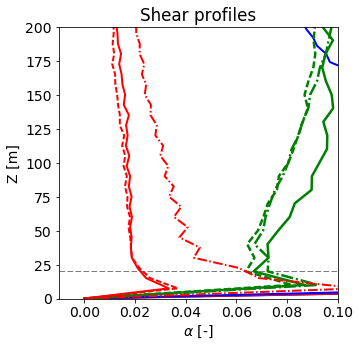

In [24]:
# Plot the Alpha profile comparisons (paper version)
plt.figure(figsize=(5,5));
plt.rc('font', size=14)
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    data     = alldata[irun]
    Wdir     = data[3]
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    Alphaprof = allAlphadata[irun]
    plt.plot(Alphaprof[:,1], Alphaprof[:,0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label)

for hh in plotheights: plt.hlines(hh, -0.01, 0.2, linestyles='dashed', linewidth=0.5)
#plt.legend()
plt.ylim([0,200]);
plt.xlim([-0.01, 0.1])
plt.xlabel('$\\alpha$ [-]')
plt.ylabel('Z [m]')
plt.title('Shear profiles')

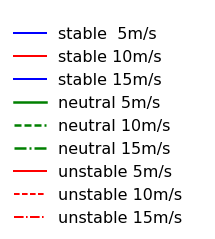

In [25]:
# --- just make a legend ---
legend_el = []
for irun, run in enumerate(runlist):
    rundict  = runlist[irun][NumReqCols] if len(runlist[irun])>NumReqCols else {}
    pltcolor = getparam('color', rundict, 'b')
    lstyle   = getparam('lstyle', rundict, '-') 
    lw       = getparam('lw', rundict, 1) 
    label    = run[0]
    legend_el.append(Line2D([0],[0], linestyle=lstyle, color=pltcolor, linewidth=lw, label=label))
plt.figure(figsize=(3,1))
plt.legend(handles=legend_el, fontsize=16, frameon=False)
plt.axis('off')
plt.tight_layout()

# Extract yaml file BC parameters
print("%16s %9s %9s"%("Case", "z0", "heat_flux"))
print("%16s %9s %9s"%("====", "==", "========="))
for run in runlist:
    rundict       = run[NumReqCols] if (len(run)>NumReqCols) else {}
    rundir        = baserundir+'/'+run[1]
    yamlfile      = rundir+'/'+run[3]
    with open(yamlfile) as fp:
        yamldata      = yaml.load(fp)
        BCs           = yamldata['realms'][0]['boundary_conditions']
        for bc in BCs:
            if bc['target_name'] == 'lower':
                print("%16s %9.5f % 8.3f"%
                    (run[0], bc['wall_user_data']['roughness_height'], bc['wall_user_data']['heat_flux']))
    fp.close()